<a href="https://colab.research.google.com/github/robertmessan/Assistant_virtuel_vocal/blob/main/ChallengeElmy_Modele_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modèle ARIMA

Le modèle ARIMA (AutoRegressive Integrated Moving Average) est une méthode couramment utilisée pour modéliser et prévoir les séries temporelles. Il combine les composantes de l'autorégression (AR) et de la moyenne mobile (MA) avec une différenciation (I) pour prendre en compte les tendances et les comportements saisonniers dans les données.

## Composantes du modèle ARIMA

- **AR (Autorégression)** : L'AR fait référence à la régression linéaire des valeurs actuelles sur les valeurs précédentes de la série temporelle. Il capture les effets de dépendance linéaire à partir des valeurs passées.
- **MA (Moyenne mobile)** : Le MA utilise la moyenne mobile des erreurs précédentes pour modéliser la relation entre les résidus et les observations actuelles de la série temporelle. Il capture les effets de dépendance entre les résidus.
- **I (Différenciation)** : La différenciation est utilisée pour rendre les données stationnaires en supprimant les tendances et les comportements saisonniers. Elle consiste à prendre la différence entre les observations consécutives jusqu'à obtenir une série stationnaire.

## Ordres du modèle ARIMA

Le modèle ARIMA est défini par trois ordres : p, d et q.

- **p (Ordre AR)** : L'ordre AR spécifie le nombre de termes autorégressifs à inclure dans le modèle. Il indique combien de valeurs passées sont utilisées pour prédire la valeur actuelle.
- **d (Ordre de différenciation)** : L'ordre de différenciation indique combien de fois la série doit être différenciée pour rendre les données stationnaires.
- **q (Ordre MA)** : L'ordre MA spécifie le nombre de termes de la moyenne mobile à inclure dans le modèle. Il indique combien de résidus passés sont utilisés pour prédire l'observation actuelle.




## Méthodologie de Box-Jenkins le modèle ARIMA

La méthodologie de Box-Jenkins est une approche couramment utilisée pour modéliser et prévoir les séries temporelles. Elle comprend les étapes suivantes :

1. **Identification du modèle**

   - Analyse des données : Examiner les données de la série temporelle pour détecter les tendances, les saisonnalités et les comportements anormaux.
   - Différenciation : Si la série temporelle présente une tendance ou une saisonnalité, appliquer une différenciation pour rendre les données stationnaires.
   - Identification des ordres : Utiliser les graphiques ACF (fonction d'autocorrélation) et PACF (fonction d'autocorrélation partielle) pour déterminer les ordres p, d et q du modèle ARIMA.

2. **Estimation du modèle**

   - Estimation des paramètres : Utiliser les méthodes d'estimation (telles que la méthode des moindres carrés) pour estimer les paramètres du modèle ARIMA.

3. **Vérification du modèle**

   - Diagnostic du modèle : Vérifier si les résidus du modèle ARIMA sont bruit blanc (c'est-à-dire s'ils ne présentent pas de structure ou de corrélation significative).
   - Réajustement : Si le modèle ne satisfait pas les critères de bruit blanc, ajuster les ordres du modèle ARIMA et répéter les étapes précédentes.
   - Validation : Valider les performances du modèle en effectuant des prédictions sur des données de validation ou en utilisant des mesures d'évaluation telles que l'erreur quadratique moyenne (RMSE) ou le critère d'information d'Akaike (AIC).

La méthodologie de Box-Jenkins est itérative, ce qui signifie que les étapes d'identification, d'estimation et de vérification peuvent être répétées plusieurs fois pour améliorer le modèle. L'objectif est de trouver le meilleur modèle ARIMA qui capture les motifs et les caractéristiques importantes de la série temporelle, et qui peut être utilisé pour effectuer des prédictions précises.



# Importation des packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
import pytz


# Présentation de la problématique et chargement des données

# Description de la base de données AirPassengers

La base de données AirPassengers est une série temporelle classique qui représente le nombre mensuel de passagers aériens internationaux. Elle est souvent utilisée comme exemple pour illustrer les modèles de prévision, y compris les modèles ARIMA.


La base de données AirPassengers contient les colonnes suivantes :

- **Month** : La date (mois et année) de chaque observation.
- **Passengers** : Le nombre de passagers aériens internationaux pour chaque mois.


Les données de la base AirPassengers couvrent la période de janvier 1949 à décembre 1960, soit 12 années de données mensuelles.

Vous pouvez télécharger la base de données AirPassengers en utilisant le lien suivant :

[**AirPassengers.csv**](https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv)


In [ ]:
##Chargement des données
train_data_X =pd.read_csv("https://raw.githubusercontent.com/robertmessan/ChallengeElmy/main/X_train_Wwou3IE.csv")
train_data_y= pd.read_csv("https://raw.githubusercontent.com/robertmessan/ChallengeElmy/main/y_train_jJtXgMX.csv")
train_data = pd.merge(train_data_X, train_data_y, on='DELIVERY_START', how='inner')
train_data

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN,-36.874770
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN,-12.643588
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN,-1.950193
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN,1.938272
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN,0.199907
...,...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11,6.029303
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66,13.576177
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01,17.478945
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74,17.559407


In [ ]:
def convertir_timestamp(timestamp):
    timestamp_str = str(timestamp)

    dt = datetime.strptime(timestamp_str[:19], '%Y-%m-%d %H:%M:%S')

    offset_sign = 1 if timestamp_str[-6] == '+' else -1
    offset_hours = int(timestamp_str[-5:-3])
    offset_minutes = int(timestamp_str[-2:])

    total_offset_minutes = offset_sign * (offset_hours * 60 + offset_minutes)
    offset = timedelta(minutes=total_offset_minutes)

    dt = dt - offset

    return dt

In [ ]:
#Afficher la base de données

index=train_data['DELIVERY_START'].apply(convertir_timestamp)
train_data.set_index(index, inplace=True)
df = train_data[['spot_id_delta']].copy()
df

,spot_id_delta
DELIVERY_START,
2022-01-01 01:00:00,-36.874770
2022-01-01 02:00:00,-12.643588
2022-01-01 03:00:00,-1.950193
2022-01-01 04:00:00,1.938272
2022-01-01 05:00:00,0.199907
...,...
2023-03-29 17:00:00,6.029303
2023-03-29 18:00:00,13.576177
2023-03-29 19:00:00,17.478945


In [ ]:
# Renommage de la colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10605 entries, 2022-01-01 01:00:00 to 2023-03-29 21:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   spot_id_delta  10605 non-null  float64
dtypes: float64(1)
memory usage: 165.7 KB


In [ ]:
# Information sur la base de données
df.describe()

,spot_id_delta
count,10605.000000
mean,0.943358
std,38.093819
min,-1567.353547
25%,-11.934152
50%,0.059125
75%,12.190489
max,658.961329


In [ ]:
train_data['spot_id_delta']==df['spot_id_delta']

DELIVERY_START
2022-01-01 01:00:00    True
2022-01-01 02:00:00    True
2022-01-01 03:00:00    True
2022-01-01 04:00:00    True
2022-01-01 05:00:00    True
                       ... 
2023-03-29 17:00:00    True
2023-03-29 18:00:00    True
2023-03-29 19:00:00    True
2023-03-29 20:00:00    True
2023-03-29 21:00:00    True
Name: spot_id_delta, Length: 10605, dtype: bool

In [ ]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series (e.g., 1 for annual, 4 for quarterly, etc). Must
        be used if x is not a pandas object or if the index of x does not have
        a frequency. Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
 

In [ ]:
train_data[:]

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
DELIVERY_START,,,,,,,,,,,
2022-01-01 01:00:00,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN,-36.874770
2022-01-01 02:00:00,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN,-12.643588
2022-01-01 03:00:00,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN,-1.950193
2022-01-01 04:00:00,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN,1.938272
2022-01-01 05:00:00,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN,0.199907
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 17:00:00,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11,6.029303
2023-03-29 18:00:00,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66,13.576177
2023-03-29 19:00:00,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01,17.478945


In [ ]:
# Vérification des valeurs manquante
df.isnull().sum()

spot_id_delta    0
dtype: int64

# Etape 1: Identification du modèle

## Analyse des données

## Représentation graphique

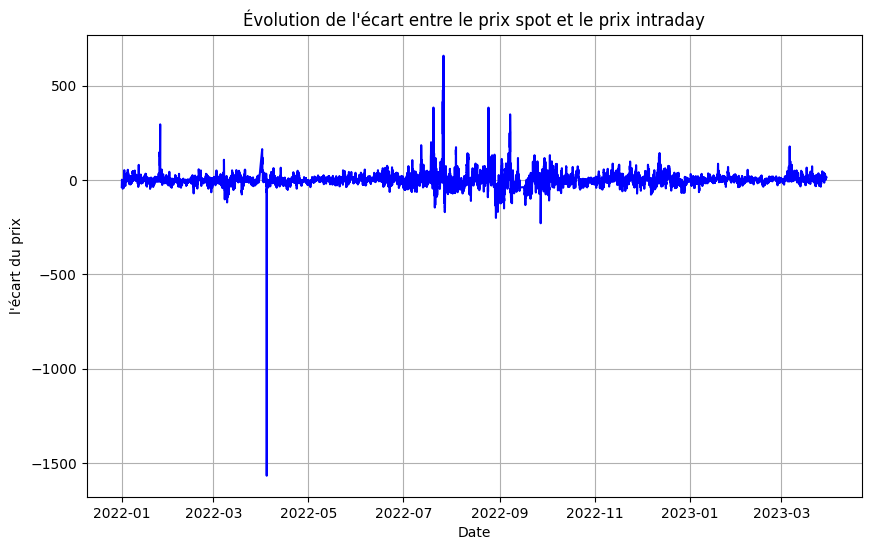

In [ ]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['spot_id_delta'], color='blue')
plt.title('Évolution de l\'écart entre le prix spot et le prix intraday')
plt.xlabel('Date')
plt.ylabel('l\'écart du prix')
plt.grid(True)
plt.show()

### ACF et PACF

L'ACF (Autocorrelation Function) et la PACF (Partial Autocorrelation Function) sont deux outils essentiels en analyse de séries temporelles. Elles permettent de comprendre les dépendances temporelles dans une série de données.

#### ACF (Autocorrelation Function)

L'ACF mesure la corrélation entre une séquence et elle-même à différentes périodes de temps. Autrement dit, elle permet d'évaluer la similitude entre les observations en fonction du décalage de temps entre elles.

**Pour un décalage 'k', l'ACF mesure la corrélation entre la série temporelle et elle-même décalée de 'k' périodes.**

Par exemple, **une ACF de 0,9 à un décalage de 2 signifie que les données sont très similaires à elles-mêmes il y a deux périodes de temps**.

#### PACF (Partial Autocorrelation Function)

La PACF est une corrélation qui exclut l'effet des termes intermédiaires. C'est-à-dire qu'elle est une mesure de la corrélation entre des observations à un certain intervalle, en tenant compte des valeurs à des intervalles plus courts.

Pour un décalage 'k', **la PACF est la corrélation entre la série temporelle et elle-même décalée de 'k' périodes, mais après avoir soustrait les effets des décalages 1 à 'k-1'**.

Par exemple, une PACF de 0,5 à un décalage de 3 signifie que les données sont moyennement similaires à elles-mêmes il y a trois périodes de temps, après avoir pris en compte les décalages 1 et 2.

#### Utilisations

Les graphiques ACF et PACF sont couramment utilisés pour aider à choisir les paramètres d'un modèle ARIMA en analyse de séries temporelles. Par exemple, **le graphique ACF peut être utilisé pour identifier le terme MA (moyenne mobile)** du modèle, tandis que le graphique **PACF peut aider à identifier le terme AR (auto-régressif).**


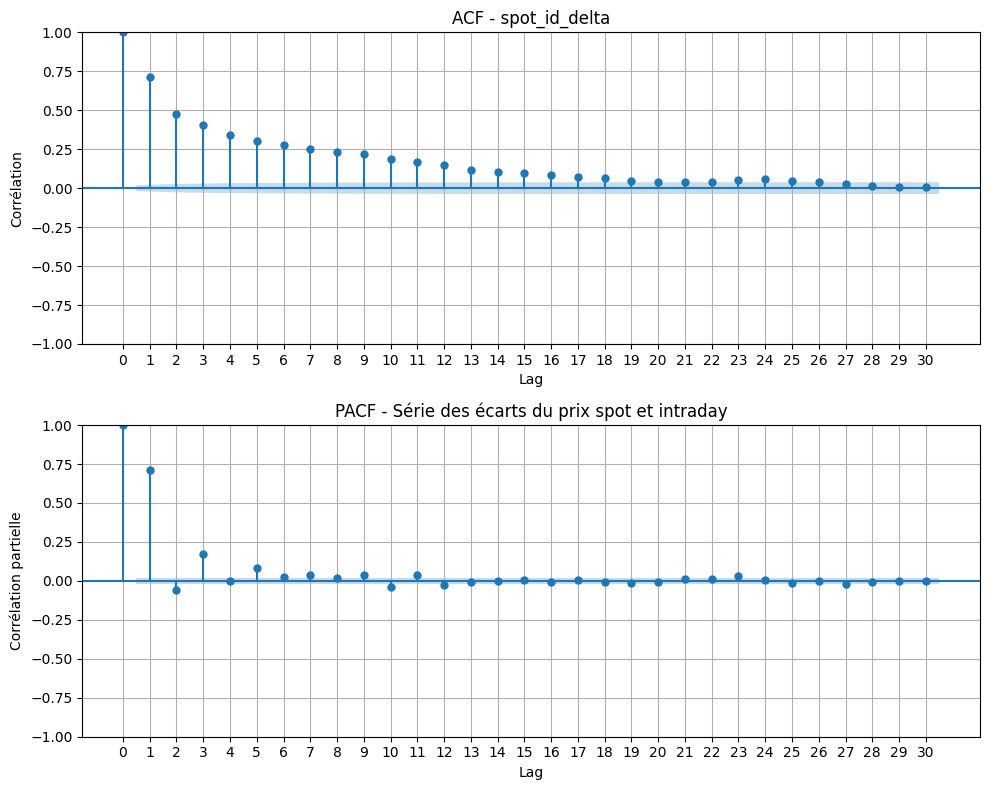

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(df['spot_id_delta'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - spot_id_delta')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(df['spot_id_delta'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série des écarts du prix spot et intraday')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [ ]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(df)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -20.75740567960391        |
| P-valeur       | 0.0                       |
| Conclusion     | La série est stationnaire |


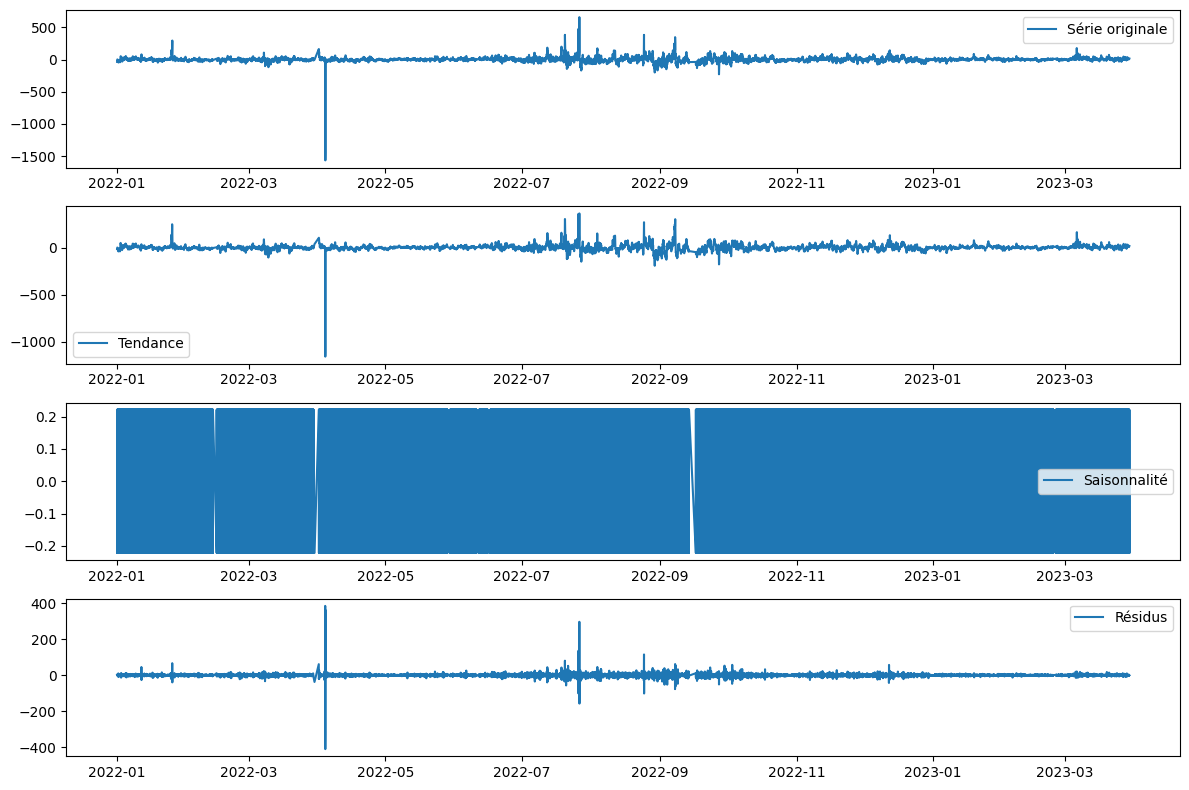

In [ ]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df['spot_id_delta'], model='additive',period=2)

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['spot_id_delta'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Différentciation (Stationnarisation)

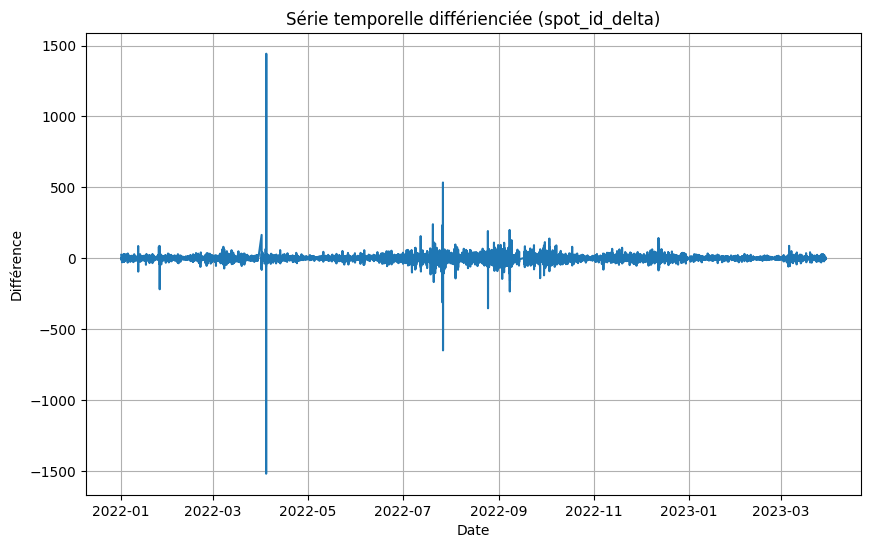

In [ ]:

# Différenciation pour rendre la série stationnaire
differenced = df['spot_id_delta'].diff().dropna()

# Afficher la série différienciée
plt.figure(figsize=(10, 6))
plt.plot(differenced)
plt.title('Série temporelle différienciée (spot_id_delta)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()


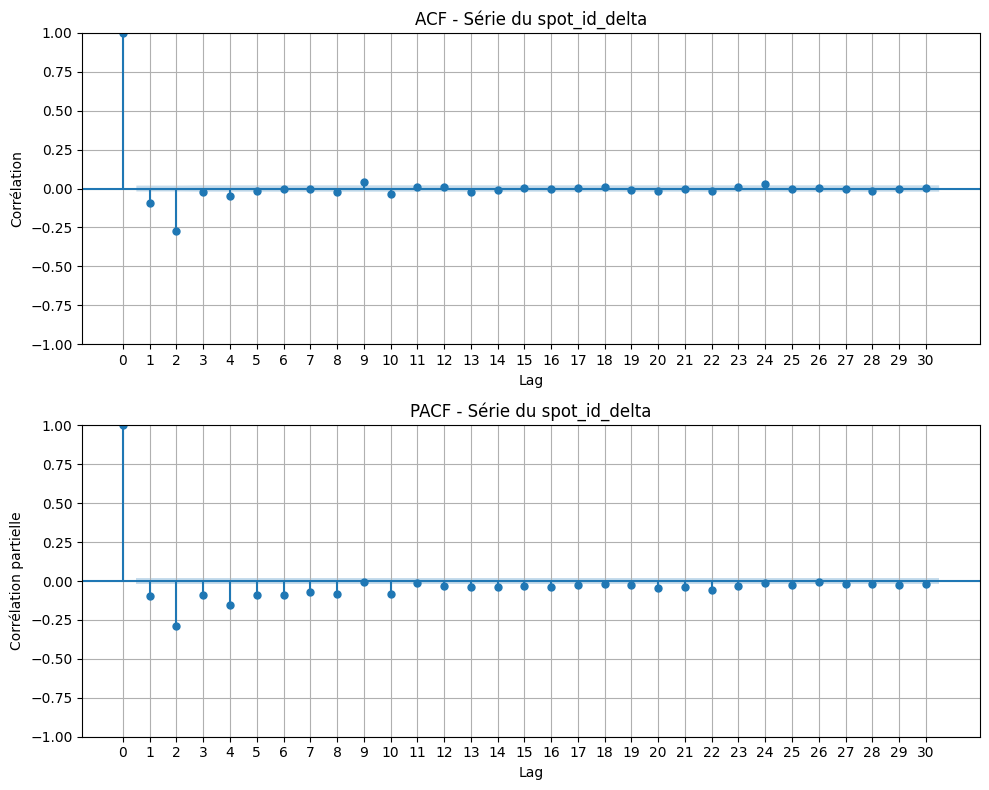

In [ ]:
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série du spot_id_delta')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série du spot_id_delta')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [ ]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -26.198391116706226       |
| P-valeur       | 0.0                       |
| Conclusion     | La série est stationnaire |


## Identification de l'ordre p,d,q

In [ ]:
p=2
d=1
q=1,3

In [ ]:
# Séparer les données en ensemble d'entraînement et ensemble de test
train_df = df[['spot_id_delta']][:-720]
test_df = df[['spot_id_delta']][-720:]

In [ ]:
train_df

,spot_id_delta
DELIVERY_START,
2022-01-01 01:00:00,-36.874770
2022-01-01 02:00:00,-12.643588
2022-01-01 03:00:00,-1.950193
2022-01-01 04:00:00,1.938272
2022-01-01 05:00:00,0.199907
...,...
2022-12-28 17:00:00,-58.657606
2022-12-28 18:00:00,-37.139058
2022-12-28 19:00:00,-38.963262


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2022-12-28 22:00:00 to 2023-03-29 21:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   spot_id_delta  2160 non-null   float64
dtypes: float64(1)
memory usage: 33.8 KB


# Estimation du modèle

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_df, order=(2,1,1))

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          spot_id_delta   No. Observations:                 9885
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -46793.894
Date:                Fri, 31 May 2024   AIC                          93595.788
Time:                        21:56:24   BIC                          93624.582
Sample:                             0   HQIC                         93605.540
                               - 9885                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7019      0.003    262.463      0.000       0.697       0.707
ar.L2         -0.0972      0.001    -71.117      0.000      -0.100      -0.094
ma.L1         -0.9514      0.002   -497.872      0.0

# Vérification du modèle



Après avoir ajusté un modèle ARIMA, il est crucial de vérifier les résidus du modèle pour s'assurer de la qualité de l'ajustement. Les résidus sont la différence entre les valeurs observées et les valeurs prédites par le modèle. Si le modèle est bien ajusté, les résidus doivent se comporter comme un bruit blanc, c'est-à-dire être une série temporelle aléatoire à distribution normale, avec une moyenne de zéro et sans autocorrélation. Voici quelques points clés à vérifier :

## Test de Ljung-Box

Le test de Ljung-Box teste l'absence d'autocorrélation dans les résidus. Nous voulons que les résidus soient indépendants les uns des autres. Une faible valeur p (p < 0,05) indique une preuve d'autocorrélation.

## Hétéroscédasticité

L'hétéroscédasticité se réfère à la situation dans laquelle la variabilité de l'erreur de prédiction (ou résidu) n'est pas constante à travers toutes les observations. Nous préférons avoir une erreur de prédiction constante, donc la vérification de l'hétéroscédasticité est importante. Un bon modèle devrait présenter une homoscédasticité, c'est-à-dire une variance constante des résidus.

## Normalité

L'aspect de normalité fait référence à la distribution des résidus. Dans un bon modèle, nous attendons que les résidus suivent une distribution normale. Pour vérifier cela, nous pouvons utiliser un graphique Q-Q ou effectuer un test statistique, comme le test de Shapiro-Wilk, pour vérifier la normalité.

## Graphiques des résidus

En plus des tests statistiques, il est utile de tracer les résidus au fil du temps, ainsi que leur autocorrélation (ACF et PACF), pour vérifier visuellement les suppositions précédentes. Dans un modèle bien ajusté, les résidus devraient ressembler à un bruit blanc lorsqu'ils sont tracés dans le temps, et l'ACF et le PACF devraient montrer peu ou pas de corrélation significative.

Rappelez-vous, aucun modèle n'est parfait, et tous ces tests et graphiques sont des outils pour vous aider à comprendre si votre modèle est "suffisamment bon" pour répondre à vos besoins spécifiques.


<Figure size 1000x500 with 0 Axes>

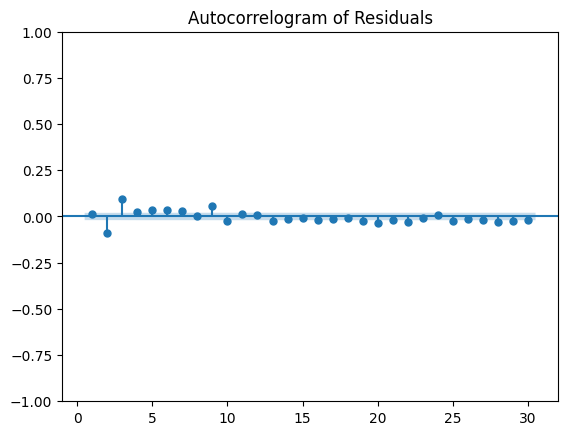

<Figure size 1000x500 with 0 Axes>

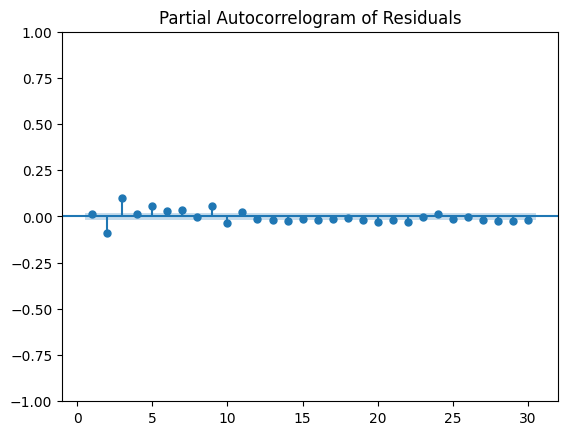

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les résidus
residuals = model_fit.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

# Tracer la PACF des résidus
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()


In [ ]:
test_df.isna().sum()

spot_id_delta    0
dtype: int64

In [ ]:
test_predictions = []
test_size = 720

for i in range(test_size):
    train = df[:-(test_size-i)]
    model = ARIMA(test_df, order=(2,1,1))
    model_fit = model.fit()
    pred = model_fit.forecast(horizon=1)
    test_predictions.append(pred)
test_predictions = pd.Series(test_predictions, index=df.index[-test_size:])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dat

In [ ]:
train_predictions = []
train_size = 9885

for i in range(train_size):
    train = df[:-(train_size-i)]
    pred = model_fit.forecast(horizon=1)
    train_predictions.append(pred)
train_predictions = pd.Series(train_predictions, index=df.index[:train_size])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pred

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model1 = ARIMA(test_df, order=(2,1,1))

# Ajuster le modèle
model_fitest = model.fit()

# Afficher le résumé du modèle
print(model_fitest.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          spot_id_delta   No. Observations:                 9885
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -46793.894
Date:                Fri, 31 May 2024   AIC                          93595.788
Time:                        22:22:41   BIC                          93624.582
Sample:                             0   HQIC                         93605.540
                               - 9885                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7019      0.003    262.463      0.000       0.697       0.707
ar.L2         -0.0972      0.001    -71.117      0.000      -0.100      -0.094
ma.L1         -0.9514      0.002   -497.872      0.0

# Prédiction

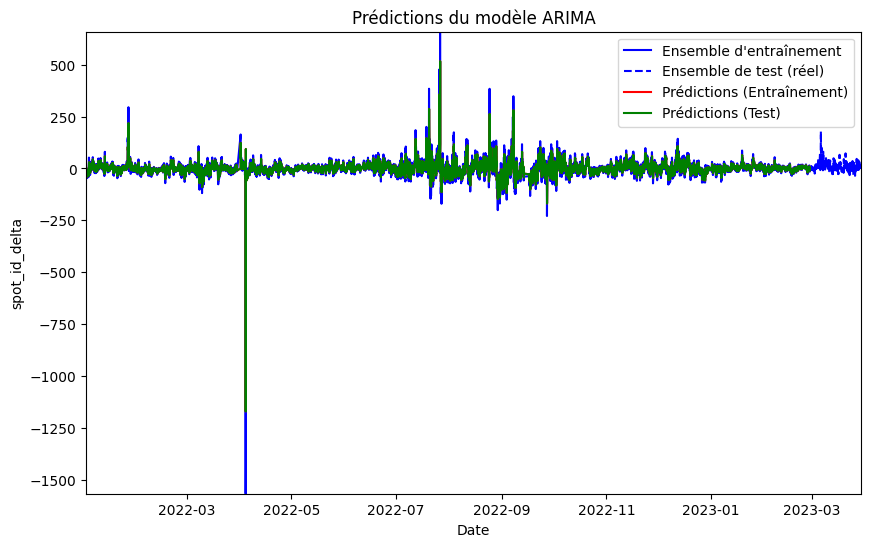

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



train_predictions = model_fit.predict(start=str(train_df.index[0]),
                                      end=str(train_df.index[-1]))

# Convertir les valeurs prédites en pandas Series avec les bons indices
#test_predictions = pd.Series(forecast_values, index=test_df.index)

test_predictions = model_fitest.predict(start=str(train_df.index[0]), end=str(train_df.index[-1]))


plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_df.index, test_df.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_df.index[0], test_df.index[-1])
plt.ylim(min(train_df['spot_id_delta'].min(), test_df['spot_id_delta'].min()), max(train_df['spot_id_delta'].max(), test_df['spot_id_delta'].max()))

plt.xlabel('Date')
plt.ylabel('spot_id_delta')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

In [ ]:
test_predictions

DELIVERY_START
2022-01-01 01:00:00     0.000000
2022-01-01 02:00:00   -36.871556
2022-01-01 03:00:00   -15.010863
2022-01-01 04:00:00    -7.471749
2022-01-01 05:00:00    -4.310401
                         ...    
2023-02-27 17:00:00     2.332227
2023-02-27 18:00:00    -3.436122
2023-02-27 19:00:00   -10.971047
2023-02-27 20:00:00    -0.246120
2023-02-27 21:00:00    -3.837007
Name: predicted_mean, Length: 9885, dtype: float64

In [ ]:
# Mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_df, train_predictions)
train_mse = mean_squared_error(train_df, train_predictions)
train_rmse = mean_squared_error(train_df, train_predictions, squared=False)
train_r2 = r2_score(train_df, train_predictions)

# Mesures de performance sur l'ensemble de test
#test_mae = mean_absolute_error(test_df, test_predictions)
#test_mse = mean_squared_error(test_df, test_predictions)
#test_rmse = mean_squared_error(test_df, test_predictions, squared=False)
#test_r2 = r2_score(test_df, test_predictions)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    #'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)

  Métrique  Ensemble d'entraînement
0      MAE                11.841906
1      MSE               758.030879
2     RMSE                27.532361
3       R²                 0.502787


# Modèle automatique

In [ ]:
#!pip install pmdarima

import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['spot_id_delta'][:-720]
test_data = df['spot_id_delta'][-720:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9885
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -46595.415
Date:                Fri, 31 May 2024   AIC                          93204.830
Time:                        22:33:50   BIC                          93255.221
Sample:                             0   HQIC                         93221.897
                               - 9885                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2874      0.040      7.272      0.000       0.210       0.365
ar.L2          0.7118      0.035     20.594      0.000       0.644       0.780
ar.L3         -0.1495      0.010    -14.595      0.0

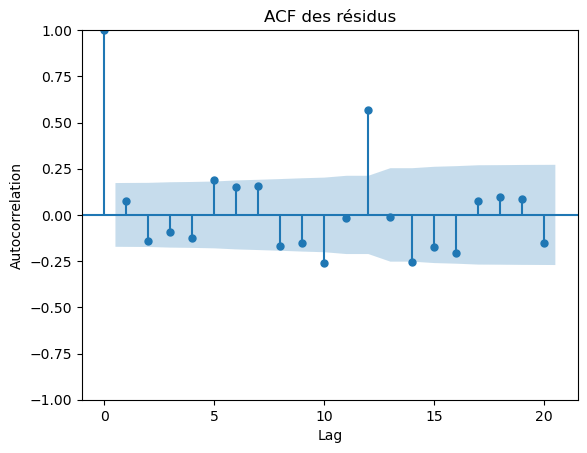

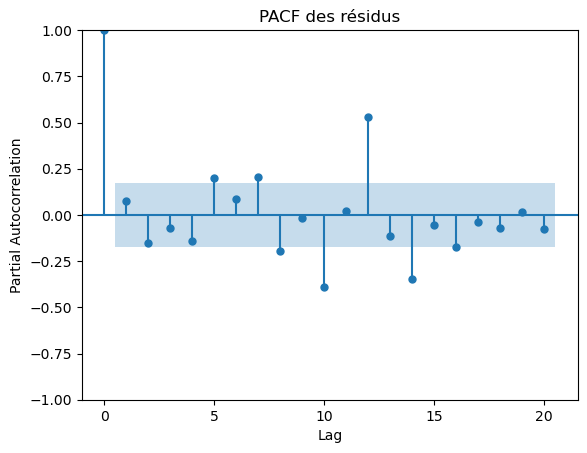

In [ ]:
# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()

# Tracer la fonction d'autocorrélation (ACF) des résidus
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF des résidus')
plt.show()

# Tracer la fonction d'autocorrélation partielle (PACF) des résidus
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF des résidus')
plt.show()

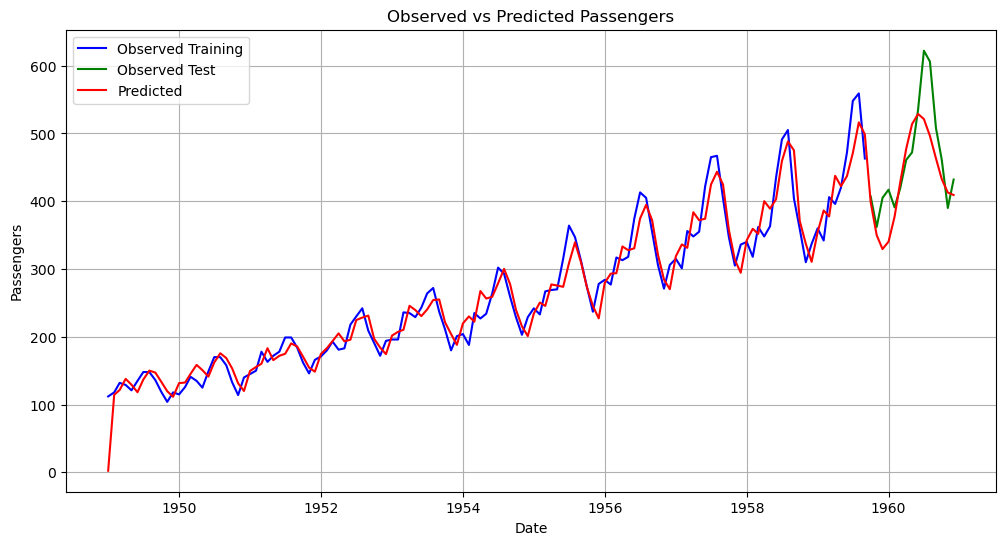

In [ ]:

# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index),
                             pd.Series(predicted, index=test_data.index)],
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)




  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                19.581814         39.311028
1      MSE               656.693909       2679.985252
2     RMSE                25.626040         51.768574
3       R²                 0.941052          0.527275


# Quiz

### Quiz sur le modèle ARIMA en Python

**Question 1: Qu'est-ce que ARIMA signifie en termes de modélisation de séries chronologiques?**


a) Autoregressive Integrated Moving Average

b) Auto Regression Inverse Moving Average

c) Adaptive Recursive Integrated Moving Average

d) All-inclusive Regression for Integrated Moving Averages


**Question 2: Comment peut-on sélectionner les ordres p, d, q pour un modèle ARIMA ?**

a) Par la méthode de Box-Jenkins

b) En utilisant la méthode de l'erreur absolue moyenne

c) Par le calcul des coefficients de corrélation

d) En utilisant uniquement les ordres p et q comme paramètres


**Question 3: Comment évalue-t-on les performances d'un modèle ARIMA ?**

a) En utilisant le coefficient de corrélation

b) En calculant l'erreur absolue moyenne (MAE)

c) En comparant les prédictions avec les données réelles

d) Toutes les réponses ci-dessus


**Question 4: Que signifie un bruit blanc dans les résidus d'un modèle ARIMA ?**


a) Les résidus sont non autocorrélé, homoscédastique et normalement distribuée

b) Les résidus ont une autocorrélation significative aux lags non nuls

c) Les résidus ont une variance croissante avec le temps